## Практическое задание

- Отфильтруйте данные, оставив только информацию по 2014 году.
- Используйте эти данные и код из урока для того, чтобы нарисовать график цен на акции компании Tesla в 2014 году.
- Представьте, что акции были куплены на уровне 250$ и теперь интересно увидеть, как часто цена поднималась выше этого порога.
- Попробуйте придумать, как автоматически вычислить явно заданные числа 0 и 300 при задании yticks.
- Даты рисовать не обязательно, но вы можете изобразить те, что кажутся вам важными :)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
data = pd.read_csv('data/Tesla.csv', parse_dates=True, index_col='Date')

In [2]:
filtered_data = data[data.index.year == 2014]

In [3]:
from pandas.tseries.offsets import MonthEnd
date = filtered_data.index[0]
dates = []
while date < filtered_data.index[-1]:
    date = date + MonthEnd(1)
    dates.append(date)

In [4]:
buy_price = 250

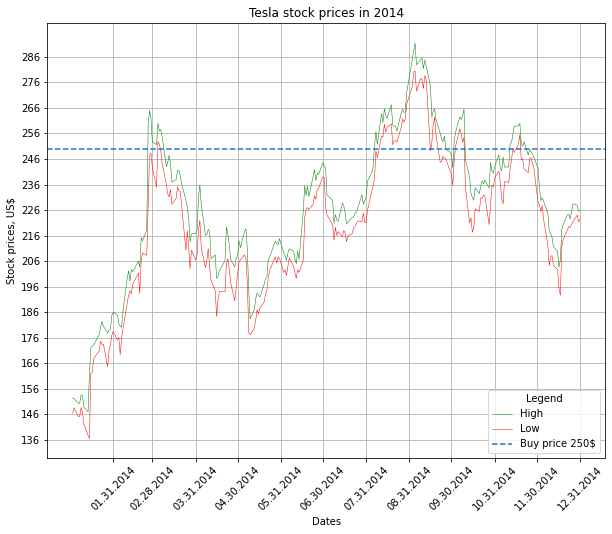

In [5]:
plt.figure(figsize=(10,8))
high_prices_line, = plt.plot(filtered_data.index, filtered_data['High'], label='High', color='g')
low_prices_line, = plt.plot(filtered_data.index, filtered_data['Low'], label='Low', color='r')
plt.setp([high_prices_line, low_prices_line], linewidth=0.5)
plt.axhline(y=buy_price, ls='--', label='Buy price {}$'.format(buy_price))
plt.xlabel('Dates')
plt.ylabel('Stock prices, US$')
plt.grid()
plt.xticks(dates, labels=[pd.to_datetime(str(date)).strftime("%m.%d.%Y") for date in dates], rotation=45)
yticks = range(math.floor(np.min(filtered_data['Low'])), math.ceil(np.max(filtered_data['High'])), 10)
plt.yticks(yticks)
plt.legend(loc='lower right', title='Legend')
plt.title('Tesla stock prices in 2014')
plt.savefig('img/Tesla stock prices.png')